In [36]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [37]:
data = pd.read_csv('states.csv')
n = data.shape[0]

In [38]:
graduation = data['hs_grad']
poverty = data['poverty']

Text(0, 0.5, 'poverty')

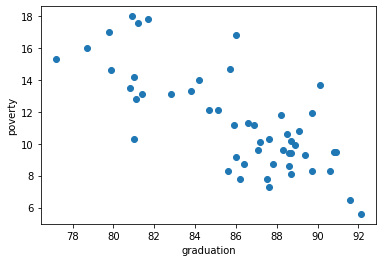

In [39]:
plt.scatter(graduation, poverty)
plt.xlabel('graduation')
plt.ylabel('poverty')

In [40]:
graduation_mean = graduation.mean()
poverty_mean = poverty.mean()
graduation_variance = sum((graduation - graduation_mean) ** 2) / n
poverty_variance = sum((poverty - poverty_mean) ** 2) / n
cov = sum((graduation - graduation_mean) * (poverty - poverty_mean)) / n
sd_graduation = graduation_variance ** 0.5
sd_poverty = poverty_variance ** 0.5
cor = cov / (sd_graduation * sd_poverty)

In [41]:
slope = (sd_poverty / sd_graduation) * cor
intercept = poverty_mean - slope * graduation_mean
r_sq = cor ** 2

In [42]:
print('Коэффициент детерминации: {}\nСвободный коэффициент: {} \nУгловой коэффициент: {}'.format(r_sq, intercept, slope))

Коэффициент детерминации: 0.5577972503105934
Свободный коэффициент: 64.78096577010206 
Угловой коэффициент: -0.6212167177940103


Text(0, 0.5, 'poverty')

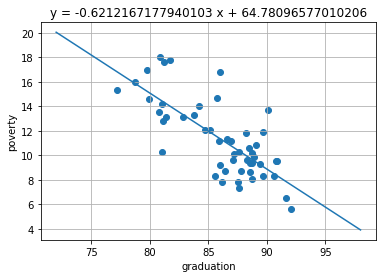

In [43]:
x = np.array([72, 98])
plt.scatter(graduation, poverty)
plt.plot(x, intercept + slope * x)
plt.grid()
plt.title('y = {} x + {}'.format(slope, intercept))
plt.xlabel('graduation')
plt.ylabel('poverty')

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
y = data.poverty
x = data.hs_grad.values.reshape(-1,1)
model = LinearRegression().fit(x, y)

In [46]:
r_sq_sk = model.score(x, y)
intercept_sk = model.intercept_
slope_sk = model.coef_

In [48]:
print('Коэффициент детерминации: {}\nСвободный коэффициент: {} \nУгловой коэффициент: {}'.format(r_sq_sk, intercept_sk, slope_sk[0]))

Коэффициент детерминации: 0.5577972503105937
Свободный коэффициент: 64.7809657701021 
Угловой коэффициент: -0.6212167177940107
